In [ ]:
# 설치한 폰트 설정 저 파일 위치의 폰트들을 확인해서 긁어옴.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline

# Add every font at the specified location
font_dir = ['C:\\Chang_git\\python_basic\\fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
    
# Set font family globally
mpl.rcParams['font.family'] = 'LINE Seed Sans KR'
print(mpl.rcParams['font.family'])
mpl.rcParams['axes.unicode_minus'] = False

Dongle
Dongle
NanumGothic
LINE Seed Sans KR
Dongle
['LINE Seed Sans KR']


In [ ]:
#기본 폰트 설정
mpl.rcParams['font.family'] = 'Hancom Gothic' # 전체 범위에 대해 폰트 설정을 적용
#mpl.rc('font',family = 'NanumGothic') # 위의 명령어와 같은 명령어이다.
mpl.rcParams['axes.unicode_minus'] = False # unicode minus 설정을 False해줌으로써 ASCII hyphen의 -1로 넣어준다. unicode -1은 꺠질 가능성이 있기 때문임.

In [ ]:
import seaborn as sns
sns.set_theme(style = 'white')
sns.set_context('paper')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#00000000'
plt.style.use('seaborn-white')# 주어진 style로 바꿔라.
import pandas as pd
import numpy as np
# axes만 색상 변경하는 법
# plt.style.use("default") 로 변경해줘야 함(style이 먼저 적용되기 때문임.)
#mpl.rcParams["axes.facecolor"] = "white"

# 노인 vs 비노인에 대한 사고 부상정도 차이 표

In [ ]:
# 노인 교통사고 자료 데이터 추출
import warnings
warnings.simplefilter("ignore") # xls 파일을 읽어오는데 발생하는 경고문을 제거하는 역할이다.
accident_rate = pd.read_excel('C:\\playdata\\23_02_01_python_mini_project\\accident.xls',skiprows=[1,2],usecols=[1,2,3,4,5,6,7,13],names=['지역구','지점명','건수','사망','중상','경상','부상','치사율'])
#columns = ['도시','지역구','지점명','건수','사망','중상','경상','부상','대형사고','사망','중상','경상','부상','치시울']
accident_rate_sum = accident_rate[0:751].sum()
acc = accident_rate_sum[2:6].sort_values(ascending = False)
old_acc = acc/acc.sum()
old_acc *= 100

#노인이 아닌 모든 사람의 교통사고 자료 데이터 추출
accident_normal = pd.read_excel('C:\\playdata\\23_02_01_python_mini_project\\every_accident.xls',skiprows=[1,2],usecols=[1,2,3,4,5,6,15],names=['지역구','건수','사망','중상','경상','부상','치사율'])
accident_normal_sum = accident_normal[:25].sum()[2:6].sort_values(ascending = False)
accident_normal_sum = accident_normal_sum - acc
acc_normal = accident_normal_sum * 100 / accident_normal_sum.sum()

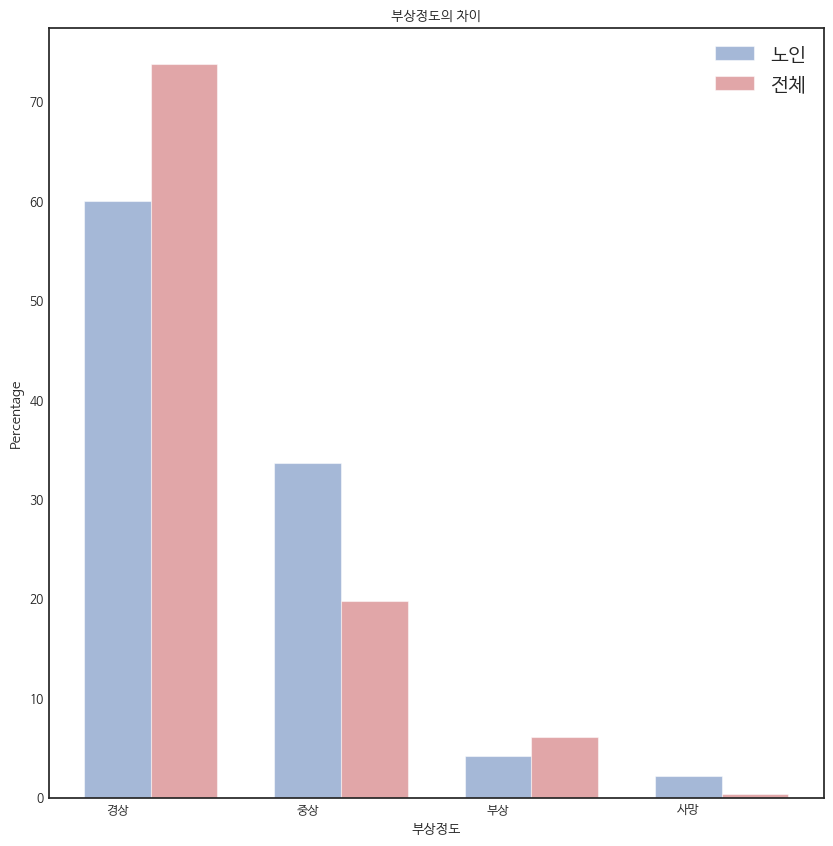

In [ ]:
#노인과 나머지 교통사고 부상정도 비율을 나타내는 bar 표 제작
bar_width = 0.35
alpha = 0.5
plt.figure(figsize = (10,10))
plt.title('부상정도의 차이')
plt.xlabel('부상정도')
plt.ylabel('Percentage')
N = len(acc.unique())
index = np.arange(N)
p1 = plt.bar(old_acc.index,old_acc.values,bar_width,color = 'b',alpha = alpha,label = 'old')
p2 = plt.bar(index+bar_width,acc_normal.values,bar_width,color = 'r',alpha = alpha,label = 'every')
plt.legend((p1,p2),('노인','전체'),fontsize = 14)
plt.show()

# 노인 사고원인에 대한 시각화

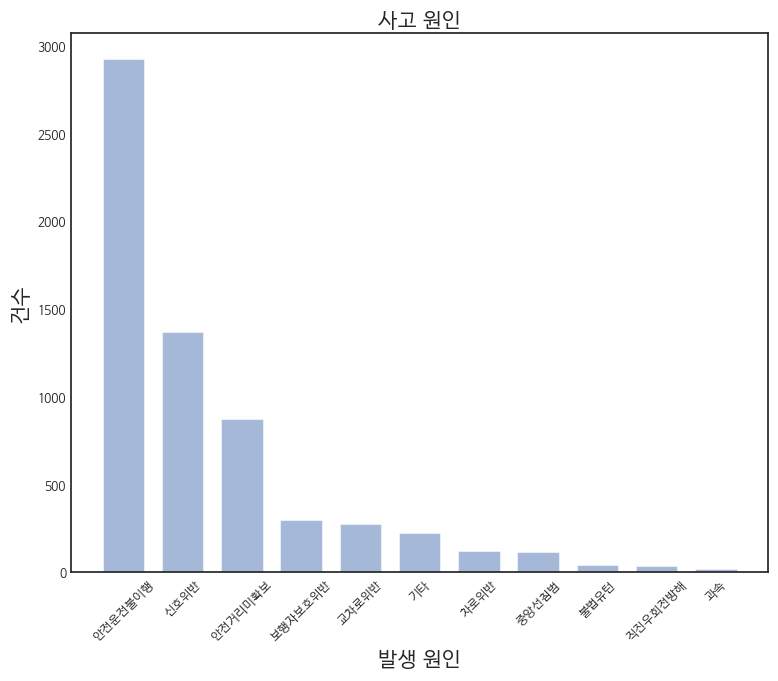

In [ ]:
law_csv = pd.read_csv('C:\\playdata\\23_02_01_python_mini_project\\law.csv')
plt.figure(figsize = (9,7))
law_csv = law_csv.sum()[:11].sort_values(ascending = False)

plt.title('사고 원인',fontsize = 15)
plt.xlabel('발생 원인',fontsize = 15)
plt.ylabel('건수',fontsize = 15)
plt.xticks(rotation = 45)
plt.bar(law_csv.index,law_csv.values,0.7,color = 'b',alpha = alpha,label = 'old')
plt.show()

# 노인 인구 표

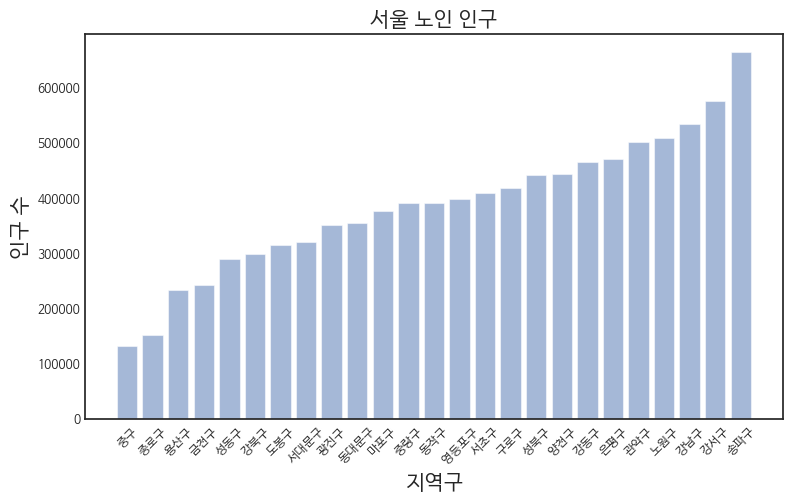

In [ ]:
data_older_population = pd.read_csv('C:\\playdata\\23_02_01_python_mini_project\\data_older_population.csv')
data_older_population = data_older_population.astype({'소계':'int'})
data_older_population = data_older_population.sort_values('소계')
plt.bar(data_older_population["동별"], data_older_population["소계"], color = 'b',alpha = alpha)
plt.title('서울 노인 인구',fontsize = 15)
plt.xlabel('지역구',fontsize = 15)
plt.ylabel('인구 수',fontsize = 15)
plt.xticks(rotation=45)
plt.show()